# Healthcare Data Analytics program

This notebook provides some of the initial commands to perform exploratory data anlyses using python for some of the basic functions to teach healthcare analyses. A step-wise approach is used for the analyses.

## 1. Importing Libraries

We start by importing libraries that have built-in functions for conducting different data importing, cleaning and analyses. Some of the key libraries often used are pandas, matplotlib, seaborn, and numpy.

In [3]:
# Importing of libararies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Settings for the figures required when plotting.
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

## 2. Loading the csv files in the python

In the cell below, I will be loading the datasets, dataframe (df) and raw mortality data (rawdf) in the Jupyter Notebook for the analyses.

In [6]:
# Complete data
df = pd.read_csv('/Users/user/OneDrive/04 - Programs/23 - HDA/dataframe.csv')
# Mortality data
rawdf = pd.read_csv('/Users/user/OneDrive/04 - Programs/23 - HDA/mort.csv')

## 3. Reviewing the data quality

In [9]:
# Head of the dataframe # By default, it only shows first 5 rows 
#which can be increased to 100 if written like this "df.head(100)""
df.head()

,Unnamed: 0,ID,SEX,AGE,HT,WT,BMI,WAIST,SBP,DBP,DEAD,TIME,TIME0
0,1,2.0,1.0,77.0,174.0,75.4,24.90,98.0,98.0,56.0,1.0,177.0,0
1,4,5.0,1.0,49.0,178.3,92.5,29.10,99.9,122.0,83.0,0.0,190.0,0
2,5,6.0,2.0,19.0,162.0,59.2,22.56,81.6,114.0,70.0,0.0,183.0,0
3,6,7.0,2.0,59.0,162.9,78.0,29.39,90.7,123.0,81.0,0.0,200.0,0
4,9,10.0,1.0,43.0,190.1,111.8,30.94,108.0,142.0,95.0,0.0,195.0,0


In [10]:
# Tail of the dataframe 
df.tail()

,Unnamed: 0,ID,SEX,AGE,HT,WT,BMI,WAIST,SBP,DBP,DEAD,TIME,TIME0
4668,9954,9955.0,1.0,37.0,177.7,91.2,28.88,106.2,112.0,82.0,0.0,188.0,0
4669,9957,9958.0,2.0,43.0,158.2,58.4,23.33,81.6,109.0,75.0,0.0,181.0,0
4670,9959,9960.0,1.0,85.0,166.8,66.4,23.87,94.5,122.0,60.0,1.0,21.0,0
4671,9960,9961.0,1.0,36.0,180.3,83.1,25.56,97.7,126.0,81.0,0.0,187.0,0
4672,9964,9965.0,2.0,84.0,167.0,57.9,20.76,79.5,226.0,82.0,1.0,131.0,0


## 4. Exploratory Data Analyses

In [12]:
# The command helps to convert variables to float if format allowed
pd.set_option("display.float", "{:.2f}".format)
# the describe() provides the basic statistics for all the features of the dataframe.
# For example, SEX has 4673 observations as is for age.
# For quantitative variables, we also have mean, std deviation and other descriptive statistics
df.describe()

,Unnamed: 0,ID,SEX,AGE,HT,WT,BMI,WAIST,SBP,DBP,DEAD,TIME,TIME0
count,4673.00,4673.00,4673.00,4673.00,4673.00,4673.00,4673.00,4673.00,4673.00,4673.00,4673.00,4673.00,4673.00
mean,4974.91,4975.91,1.52,46.18,166.65,77.92,27.98,95.41,125.14,70.42,0.23,170.06,0.00
std,2864.69,2864.69,0.50,20.16,10.04,19.29,6.17,15.34,20.76,14.31,0.42,45.74,0.00
min,1.00,2.00,1.00,18.00,130.40,25.60,12.04,58.50,73.00,0.00,0.00,1.00,0.00
25%,2475.00,2476.00,1.00,28.00,159.40,64.30,23.67,84.20,111.00,63.00,0.00,181.00,0.00
50%,4960.00,4961.00,2.00,44.00,166.30,75.10,26.97,94.70,121.00,71.00,0.00,188.00,0.00
75%,7434.00,7435.00,2.00,63.00,173.70,88.20,31.24,105.10,135.00,79.00,0.00,194.00,0.00
max,9964.00,9965.00,2.00,85.00,201.30,193.30,66.44,173.40,226.00,132.00,1.00,201.00,0.00


0.00    3612
1.00    1061
Name: DEAD, dtype: int64


<AxesSubplot:>

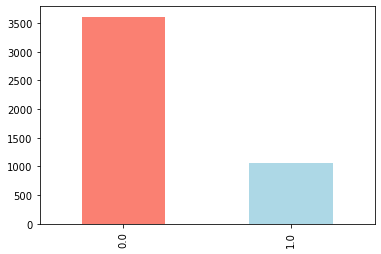

In [16]:
# The "DEAD" is the main outcome variable (target variable).
# The command below will allow to plot the values of the target variable
# There are 3612 people who survived and 1061 who died
print(df.DEAD.value_counts())
df.DEAD.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [15]:
# Checking for messing values (there are no missing values)
df.isna().sum()

Unnamed: 0    0
ID            0
SEX           0
AGE           0
HT            0
WT            0
BMI           0
WAIST         0
SBP           0
DBP           0
DEAD          0
TIME          0
TIME0         0
dtype: int64

In [17]:
# The following function allows you 
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

Unnamed: 0 : [   1    4    5 ... 9959 9960 9964]
ID : [2.000e+00 5.000e+00 6.000e+00 ... 9.960e+03 9.961e+03 9.965e+03]
SEX : [1. 2.]
AGE : [77. 49. 19. 59. 43. 37. 81. 38. 85. 23. 18. 53. 42. 62. 46. 68. 33. 61.
 21. 39. 70. 63. 27. 25. 75. 30. 60. 32. 52. 41. 22. 34. 64. 76. 56. 35.
 40. 65. 84. 29. 51. 28. 82. 55. 31. 69. 44. 74. 50. 47. 79. 57. 45. 58.
 54. 72. 71. 24. 26. 66. 48. 36. 78. 20. 67. 80. 73. 83.]
HT : [174.  178.3 162.  162.9 190.1 180.  166.2 174.9 144.2 158.9 168.5 164.2
 166.7 161.3 179.6 174.8 162.2 149.1 163.7 166.1 155.6 165.4 158.8 176.3
 182.1 172.6 154.1 180.4 162.7 164.1 155.4 169.2 176.7 159.2 177.2 167.8
 165.6 165.  143.3 159.6 159.9 160.1 175.1 172.4 155.2 157.2 154.9 181.7
 164.6 171.  176.  174.1 169.5 179.7 164.5 171.1 181.4 172.8 168.6 158.4
 170.9 150.5 173.9 172.  193.5 162.3 163.2 158.2 176.6 162.8 161.1 173.7
 189.5 159.1 159.  166.6 167.3 158.5 172.7 172.9 163.9 150.4 156.6 151.8
 174.7 162.1 156.7 179.9 163.8 168.1 175.7 160.2 171.6 169.6 163.3 

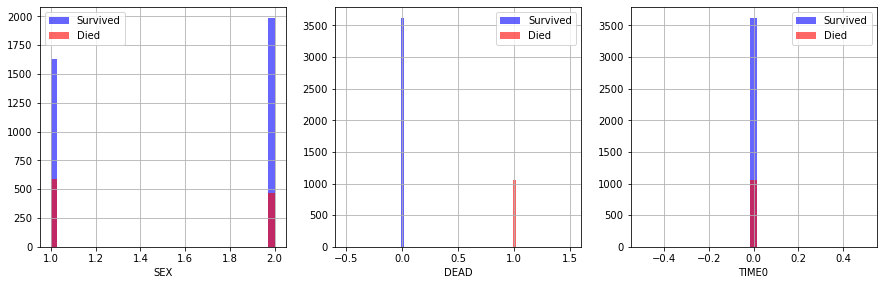

In [18]:
# The code snippet below will result in the plots of categorical variables for target variable


plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["DEAD"] == 0][column].hist(bins=35, color='blue', label='Survived', alpha=0.6)
    df[df["DEAD"] == 1][column].hist(bins=35, color='red', label='Died', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

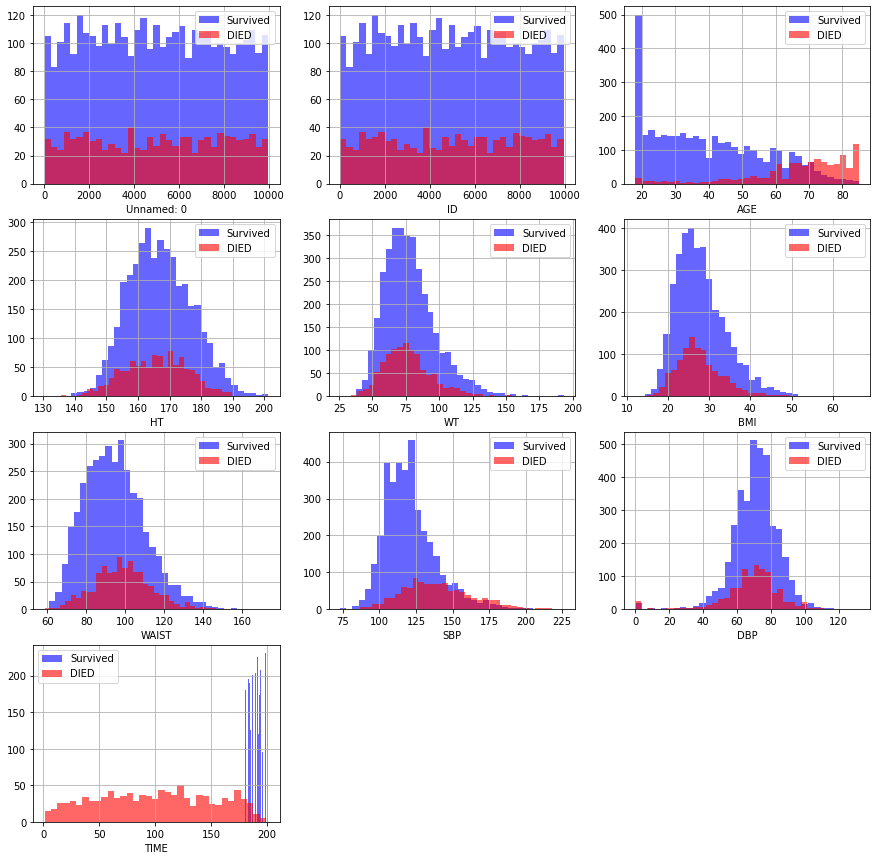

In [21]:
# The code snippet below will result in the plots of categorical variables for target variables

plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(4, 3, i)
    df[df["DEAD"] == 0][column].hist(bins=35, color='blue', label='Survived', alpha=0.6)
    df[df["DEAD"] == 1][column].hist(bins=35, color='red', label='DIED', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

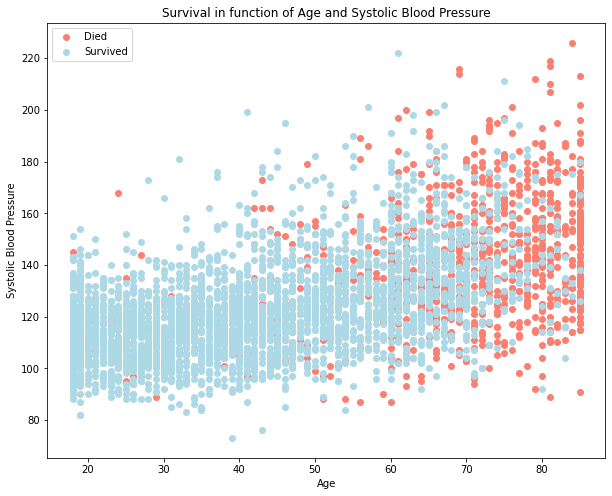

In [23]:
# Create another figure
plt.figure(figsize=(10, 8))

# Scatter with postivie examples
plt.scatter(df.AGE[df.DEAD==1],
            df.SBP[df.DEAD==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.AGE[df.DEAD==0],
            df.SBP[df.DEAD==0],
            c="lightblue")

# Add some helpful info
plt.title("Survival in function of Age and Systolic Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Systolic Blood Pressure")
plt.legend(["Died", "Survived"]);

## Correlation matrix

(13.5, -0.5)

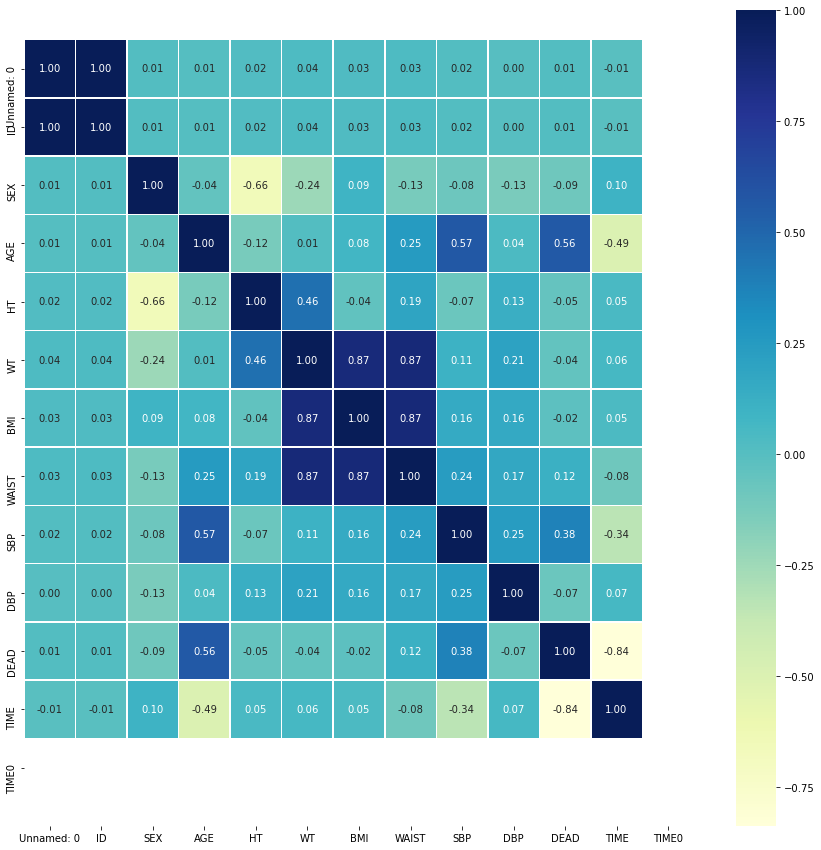

In [25]:
#Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:title={'center':'Correlation with Survival'}>

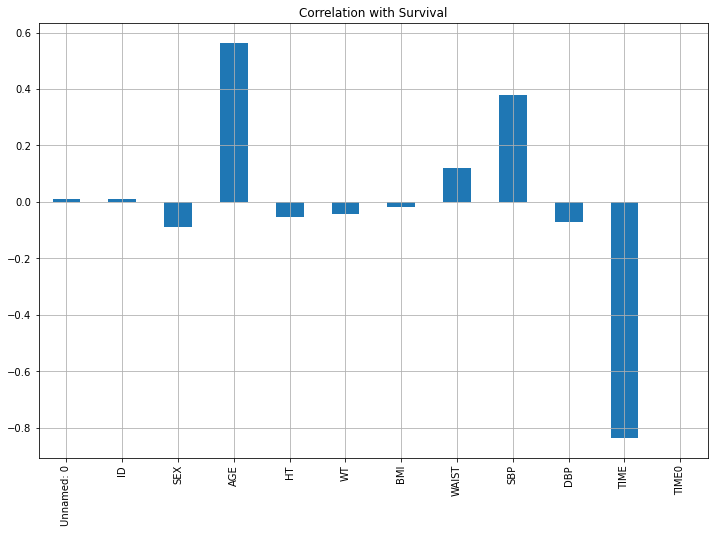

In [26]:
df.drop('DEAD', axis=1).corrwith(df.DEAD).plot(kind='bar', grid=True, figsize=(12, 8), 
                                                   title="Correlation with Survival")

## Data processing

In [27]:
categorical_val.remove('DEAD')
dataset = pd.get_dummies(df, columns = categorical_val)

from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['AGE', 'HT', 'WT', 'BMI', 'WAIST', 'SBP', 'DBP']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

## Applying logistic regression

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop(df[['Unnamed: 0','ID', 'DEAD', 'TIME', 'TIME0']], axis=1)
y = df.DEAD

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 86.12%
_______________________________________________
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision    0.89   0.73      0.86       0.81          0.85
recall       0.94   0.59      0.86       0.76          0.86
f1-score     0.91   0.65      0.86       0.78          0.86
support   2551.00 720.00      0.86    3271.00       3271.00
_______________________________________________
Confusion Matrix: 
 [[2393  158]
 [ 296  424]]

Test Result:
Accuracy Score: 83.95%
_______________________________________________
CLASSIFICATION REPORT:
              0.0    1.0  accuracy  macro avg  weighted avg
precision    0.87   0.71      0.84       0.79          0.83
recall       0.92   0.57      0.84       0.75          0.84
f1-score     0.90   0.64      0.84       0.77          0.83
support   1061.00 341.00      0.84    1402.00       1402.00
_______________________________________________
Confusion Matrix: 
 [[981  80]
 [145 196]